# <center>Fraud/Intrusion Detection</center>

Fraud detection is a novelty detection problem. Given many transactions that are seemingly "normal", when a new transaction that is significantly different ("outlier") from that pattern is detected, we want to flag that as a fraudulent or intrusion.

We will use multi-attribute dataset at https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/. The dataset in this case is flagging if a network activity is part of a normal business or if it is an anamolous/suspicious activity which is guessed based on parameters like port activity, packet lengths etc.

In [1]:
# Initialize the URI
uri = 'https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/kddcup.data_10_percent.gz'

# Make some column names for reading data
cols = ['col_{0}'.format(i) for i in range(1, 41)] + ['is_attack']

# Get fraudulent data
fraud_data_all = pd.read_csv(uri, names=cols, compression='gzip')

# Convert the status of attack type to a boolean flag
fraud_data_all['is_attack'] = fraud_data_all['is_attack'].apply(
    lambda x: 1 if x == 'normal.' else 0)

# Display the data
display(fraud_data_all)

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,is_attack
0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,1
0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,1
0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,1
0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,1
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,1
0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,1
0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,1
0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,1


## "Normal" Transactions

The labeled data contains both normal and intrusion activity samples. We want to train our machine to gain an understanding of normal behavior first, so when encountering outlier activity, the machine can take evasive measures.

Let us separate the normal and outlier samples.

In [2]:
# We will train on normal behavior
good_txns = fraud_data_all[fraud_data_all.is_attack == 1]

# Display good txns
display(good_txns)

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,is_attack
0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,1
0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,1
0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,1
0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,1
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,1
0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,1
0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,1
0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,1


## Continuous Frame

The data contains continuous attributes as well as categorical attributes. And some label attributes. We will need to convert data into a continuous (floating point attributes) to continue analysis. Let us use one-hot encoding to convert categorical attributes into numeric attributes.

In [3]:
# Since there are categorical attributes, let us convert to continuous dataframe
from sklearn.preprocessing import MinMaxScaler

# Create a scaler to change column values to lie between 0 and 1
scaler = MinMaxScaler()

# Flattened table
unscaled_txns = pd.get_dummies(
    fraud_data_all.convert_objects(convert_numeric=True))

# Normalize columns
flat_txns = pd.DataFrame(
    scaler.fit_transform(unscaled_txns), columns=[unscaled_txns.columns])

# Good txns again
norm_txns = flat_txns[flat_txns.is_attack == 1]

# Bad txns again
abnorm_txns = flat_txns[flat_txns.is_attack != 1]

# Display the frame
display(norm_txns)

,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,is_attack,col_1_icmp,col_1_tcp,col_1_udp,col_2_IRC,col_2_X11,col_2_Z39_50,col_2_auth,col_2_bgp,col_2_courier,col_2_csnet_ns,col_2_ctf,col_2_daytime,col_2_discard,col_2_domain,col_2_domain_u,col_2_echo,col_2_eco_i,col_2_ecr_i,col_2_efs,col_2_exec,col_2_finger,col_2_ftp,col_2_ftp_data,col_2_gopher,col_2_hostnames,col_2_http,col_2_http_443,col_2_imap4,col_2_iso_tsap,col_2_klogin,col_2_kshell,col_2_ldap,col_2_link,col_2_login,col_2_mtp,col_2_name,col_2_netbios_dgm,col_2_netbios_ns,col_2_netbios_ssn,col_2_netstat,col_2_nnsp,col_2_nntp,col_2_ntp_u,col_2_other,col_2_pm_dump,col_2_pop_2,col_2_pop_3,col_2_printer,col_2_private,col_2_red_i,col_2_remote_job,col_2_rje,col_2_shell,col_2_smtp,col_2_sql_net,col_2_ssh,col_2_sunrpc,col_2_supdup,col_2_systat,col_2_telnet,col_2_tftp_u,col_2_tim_i,col_2_time,col_2_urh_i,col_2_urp_i,col_2_uucp,col_2_uucp_path,col_2_vmnet,col_2_whois,col_3_OTH,col_3_REJ,col_3_RSTO,col_3_RSTOS0,col_3_RSTR,col_3_S0,col_3_S1,col_3_S2,col_3_S3,col_3_SF,col_3_SH
0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.00,0.00,0.0,0.0,1.0,0.0,0.00,0.035294,0.035294,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.00,0.00,0.0,0.0,1.0,0.0,0.00,0.074510,0.074510,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.00,0.00,0.0,0.0,1.0,0.0,0.00,0.113725,0.113725,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.00,0.00,0.0,0.0,1.0,0.0,0.00,0.152941,0.152941,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.00,0.00,0.0,0.0,1.0,0.0,0.00,0.192157,0.192157,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Train

Let us train the machine on normal state.

In [4]:
from sklearn import svm
from sklearn.model_selection import train_test_split

# Split the training set and leave 2% for validation
(train_set, test_set) = train_test_split(flat_txns.copy(), test_size=0.02)

train_set = train_set[train_set.is_attack == 1]

# Drop the class label
X_set = lambda df: df.drop(['is_attack'], axis=1)

# Merge with non-attack/normative set
X_train = X_set(train_set)

display(X_train)

# Create a classifier and fit
clf = svm.OneClassSVM(nu=0.005)
clf.fit(X_train)

,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_1_icmp,col_1_tcp,col_1_udp,col_2_IRC,col_2_X11,col_2_Z39_50,col_2_auth,col_2_bgp,col_2_courier,col_2_csnet_ns,col_2_ctf,col_2_daytime,col_2_discard,col_2_domain,col_2_domain_u,col_2_echo,col_2_eco_i,col_2_ecr_i,col_2_efs,col_2_exec,col_2_finger,col_2_ftp,col_2_ftp_data,col_2_gopher,col_2_hostnames,col_2_http,col_2_http_443,col_2_imap4,col_2_iso_tsap,col_2_klogin,col_2_kshell,col_2_ldap,col_2_link,col_2_login,col_2_mtp,col_2_name,col_2_netbios_dgm,col_2_netbios_ns,col_2_netbios_ssn,col_2_netstat,col_2_nnsp,col_2_nntp,col_2_ntp_u,col_2_other,col_2_pm_dump,col_2_pop_2,col_2_pop_3,col_2_printer,col_2_private,col_2_red_i,col_2_remote_job,col_2_rje,col_2_shell,col_2_smtp,col_2_sql_net,col_2_ssh,col_2_sunrpc,col_2_supdup,col_2_systat,col_2_telnet,col_2_tftp_u,col_2_tim_i,col_2_time,col_2_urh_i,col_2_urp_i,col_2_uucp,col_2_uucp_path,col_2_vmnet,col_2_whois,col_3_OTH,col_3_REJ,col_3_RSTO,col_3_RSTOS0,col_3_RSTR,col_3_S0,col_3_S1,col_3_S2,col_3_S3,col_3_SF,col_3_SH
458837,2.841173e-07,0.001397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033268,0.033268,0.0,0.0,0.0,0.00,1.0,0.0,0.00,0.325490,1.000000,1.00,0.00,0.01,0.02,0.0,0.0,0.2,0.31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
491429,3.504594e-07,0.000717,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048924,0.131115,0.0,0.0,0.0,0.00,1.0,0.0,0.04,0.105882,0.113725,1.00,0.00,0.04,0.07,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27722,3.244994e-07,0.001081,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048924,0.048924,0.0,0.0,0.0,0.00,1.0,0.0,0.00,0.337255,1.000000,1.00,0.00,0.01,0.01,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
143844,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.005871,0.0,0.0,1.0,1.00,1.0,0.0,1.00,0.031373,1.000000,1.00,0.00,0.12,0.06,0.0,0.0,1.0,0.53,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28568,4.658370e-07,0.000090,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017613,0.025440,0.0,0.0,0.0,0.00,1.0,0.0,0.23,1.000000,1.000000,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.005, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

## Visualize

Let us plot the globs of good transactions on a two dimensional plot to visualize "hot-spots" of normalcy and "not-spots" of outliers.

,x,y,z
0,-0.652914,0.061156,-0.097551
1,-0.472167,-0.040088,0.381811
2,-0.638109,-0.116804,-0.111449
3,-0.403060,2.338907,0.074280
4,-0.512940,-0.281835,-0.283650


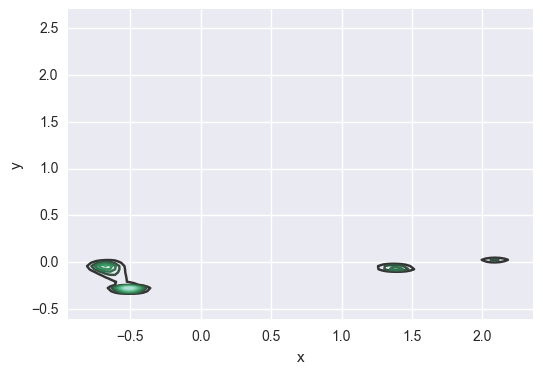

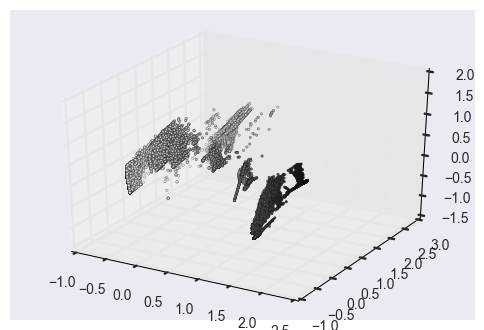

In [5]:
%matplotlib inline
from mpl_toolkits import mplot3d

# Since this is a multiattribute space, let us first plot the X spread in 
# two dimensions (PCA factorization) to see if there is any trend
from sklearn.decomposition import PCA

# Create a dimensional projector
pca = PCA(n_components=3)

# Transform the input space
X_formed = pd.DataFrame(
    pca.fit(X_train).transform(X_train), columns=['x', 'y', 'z'])

# Show a preview of the transformed X, Y coordinates in 2 dimensions before plot
display(X_formed.head())

# Plot charts - 2D first
sns.kdeplot(X_formed.x, X_formed.y)
plt.show()

# Plot in 3D too
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_formed.x, X_formed.y, X_formed.z, s=3, c=X_formed.x, zdir='z')
plt.show()

## Test/Predict

Predict if the outlier transactions are being correctly predicted outside the glob spaces or inside? How accurate is the machine in predicting the outlier/fraudulent transactions?

In [6]:
# Predict for X_test
# Filter for all known outliers (aka non normal status records)
known_outliers = test_set[test_set.is_attack == 0]
known_non_outliers = test_set[test_set.is_attack == 1]

# Strip the class label and ask to predict by the one-class SVM
y_pred_outliers = clf.predict(X_set(known_outliers))
y_pred_nonoutliers = clf.predict(X_set(known_non_outliers))

# Print accuracy
display(
    HTML(
        "<h3>Accuracy of outlier and non-outlier detection is at {0:.2f}% and {1:.2f}% respectively</h3>".
        format(
            np.count_nonzero(y_pred_outliers == -1) * 100.0 / len(
                known_outliers),
            np.count_nonzero(y_pred_nonoutliers == 1) * 100.0 / len(
                known_non_outliers))))

<hr />